<a href="https://colab.research.google.com/github/lucbijl/sociophysics/blob/main/Sociophysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import datetime
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [4]:
data_1min=pd.read_excel('/content/drive/MyDrive/Sociophysics/data_LLY_1min.xlsx')
data_daily=pd.read_excel('/content/drive/MyDrive/Sociophysics/data_LLY_daily.xlsx')

In [7]:
data_1min['timestamp_UTC']=pd.to_datetime(data_1min['timestamp'])+pd.to_timedelta('04:00:00')

In [ ]:
data_1min['timestamp']=pd.to_datetime(data_1min['timestamp'])
data_1min['return']=np.log(data['close']/data['open'])
data_daily['timestamp']=pd.to_datetime(data_daily['timestamp'])


In [ ]:
window=pd.to_timedelta('0 days 00:30:00')
for k in range(len(data_1min['timestamp'])):
  idx=(data_1min['timestamp']>(data_1min.loc[k,'timestamp']-window))&(data_1min['timestamp']<(data_1min.loc[k,'timestamp']+window));
  data_1min.loc[k,'volatility']=np.std(data_1min.loc[idx,'return']);

In [ ]:
data_1min.to_excel('/content/drive/MyDrive/Sociophysics/data_LLY_1min.xlsx')
data_daily.to_excel('/content/drive/MyDrive/Sociophysics/data_LLY_daily.xlsx')

In [ ]:
data_1min.sort_values(by=['timestamp'],inplace=True)
data_daily.sort_values(by=['timestamp'],inplace=True)
data_1min.reset_index(inplace=True)
data_daily.reset_index(inplace=True)

In [ ]:
data_1min.drop(columns=['index','Unnamed: 0'],inplace=True)
data_daily.drop(columns=['index','Unnamed: 0'],inplace=True)

KeyError: ignored

In [25]:
index=(data_1min['timestamp']<=pd.to_datetime('2022-11-13 00:00:00'))&(data_1min['timestamp']>=pd.to_datetime('2022-11-10 00:00:00'))
data_1min_filter=data_1min.loc[index]
data_1min_filter.reset_index(inplace=True)

In [ ]:
data_1min_filter.head()

,index,Unnamed: 0,timestamp,open,high,low,close,volume,return,volatility,timestamp_UTC
0,2726,2726,2022-11-10 09:32:00,363.341,365.120,362.074,362.938,40241,-0.001110,0.002259,2022-11-10 13:32:00
1,2727,2727,2022-11-10 09:33:00,362.386,363.052,361.517,361.770,3725,-0.001701,0.002205,2022-11-10 13:33:00
2,2728,2728,2022-11-10 09:34:00,361.891,362.250,361.211,361.543,5515,-0.000962,0.002154,2022-11-10 13:34:00
3,2729,2729,2022-11-10 09:35:00,361.906,362.052,360.122,360.900,15628,-0.002784,0.002110,2022-11-10 13:35:00
4,2730,2730,2022-11-10 09:36:00,360.550,361.152,360.318,361.097,1797,0.001516,0.002067,2022-11-10 13:36:00


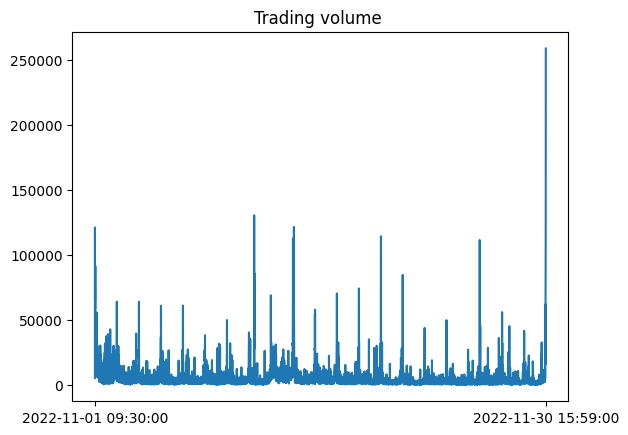

In [ ]:
plt.plot(data_1min['volume']);
id_ticks=[0,len(data_1min['timestamp'])-1];
id_labels=data_1min.loc[id_ticks,'timestamp'];
plt.xticks(ticks=id_ticks,labels=id_labels);
plt.title('Trading volume ');

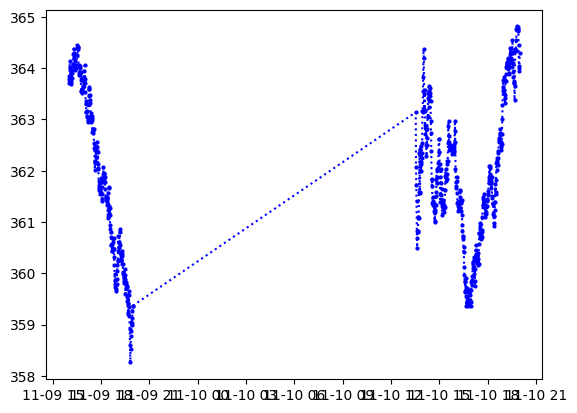

In [ ]:
axs=plt.plot(data_1min_filter['timestamp_UTC'],(data_1min_filter['open']+data_1min_filter['close'])/2,'bo:',markersize=2);


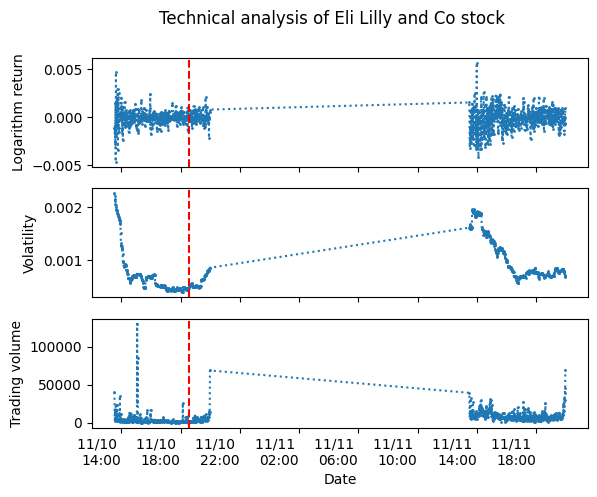

In [26]:
fig,axs=plt.subplots(3,1,sharex=True);
axs[0].plot(data_1min_filter['timestamp_UTC'],data_1min_filter['return'],'o:',markersize=1);
axs[1].plot(data_1min_filter['timestamp_UTC'],data_1min_filter['volatility'],'o:',markersize=1);
axs[2].plot(data_1min_filter['timestamp_UTC'],data_1min_filter['volume'],'o:',markersize=1);
axs[0].set_ylabel('Logarithm return');
axs[1].set_ylabel('Volatility');
axs[2].set_ylabel('Trading volume');
axs[2].xaxis.set_major_locator(mdates.HourLocator(interval=4))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d \n%H:%M'))
axs[0].axvline(x=pd.to_datetime('2022-11-10 18:36:00'),color='red',linestyle='--')
axs[1].axvline(x=pd.to_datetime('2022-11-10 18:36:00'),color='red',linestyle='--')
axs[2].axvline(x=pd.to_datetime('2022-11-10 18:36:00'),color='red',linestyle='--')
axs[2].set_xlabel('Date')

for label in axs[2].get_xticklabels(which='major'):
    label.set(rotation=0, horizontalalignment='right')
fig.suptitle('Technical analysis of Eli Lilly and Co stock');
plt.savefig('/content/drive/MyDrive/Sociophysics/stock_1.jpg')

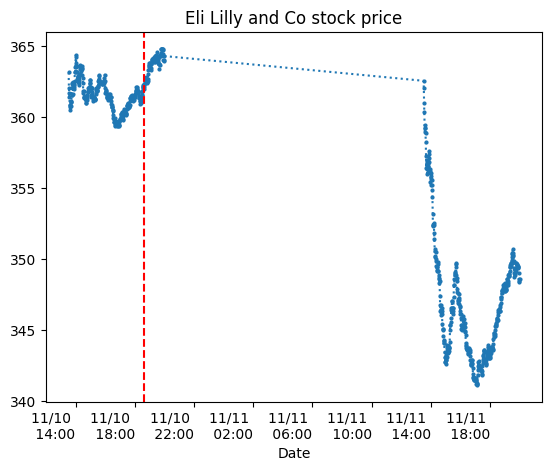

In [27]:
ax=plt.axes()
ax.plot(data_1min_filter['timestamp_UTC'],(data_1min_filter['open']+data_1min_filter['close'])/2,'o:',markersize=2);
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d \n %H:%M'))
ax.set_xlabel('Date')
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=0, horizontalalignment='right')
ax.set_title('Eli Lilly and Co stock price')
plt.axvline(x=pd.to_datetime('2022-11-10 18:36:00'),color='red',linestyle='--')
plt.savefig('/content/drive/MyDrive/Sociophysics/stock_2.jpg')